In [19]:
import numpy as np
import math
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy import stats

In [2]:
all_df=pd.read_excel('trainDataset.xls', index_col=False)
all_df.drop('ID', axis=1, inplace=True)
all_df.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.0,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.0,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.0,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.0,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [3]:
#Remove outcome instances with missing values

In [4]:
imputed_df = all_df[all_df['pCR (outcome)'] != 999]
imputed_df = imputed_df[imputed_df['RelapseFreeSurvival (outcome)'] != 999]
imputed_df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,3.950000e+02,3.950000e+02,3.950000e+02,395.000000,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.243038,55.860127,51.860679,0.541772,2.931646,2.843038,2.860759,9.972152,6.640506,8.718987,...,3.939499e-01,3.892751e-01,2.710568e+00,0.003282,5.753750e+07,178.535250,32911.425364,0.056585,0.005941,0.029639
std,0.429462,26.649447,10.930083,0.498884,50.247235,50.251456,50.250624,86.633083,70.886571,86.742103,...,1.680516e-01,1.629895e-01,7.588167e-01,0.002403,7.108221e+08,1051.812623,178630.940199,0.047387,0.008434,0.116617
min,0.000000,5.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.425736,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.194476e-01,3.165775e-01,2.327081e+00,0.001310,1.119281e+06,18.723677,0.001843,0.018575,0.000309,0.001474
50%,0.000000,55.000000,51.200548,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.097481e-01,4.048276e-01,2.807355e+00,0.002847,3.469426e+06,68.117000,0.004383,0.046980,0.002294,0.003208
75%,0.000000,72.791667,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,5.000099e-01,4.957960e-01,3.277613e+00,0.004679,9.341503e+06,155.512297,0.013772,0.084692,0.007895,0.009504
max,1.000000,144.000000,79.603012,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [5]:
#Replace rows with missing patient feature values with MEDIAN values

In [6]:
#patient_feature_rows = imputed_df[imputed_df.isin([999]).any(axis=1)] #code to locate rows with missing values
imputed_df.replace(to_replace=999, value=np.NaN, inplace=True)
imputed_df = imputed_df.fillna(imputed_df.median())
imputed_df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,3.950000e+02,3.950000e+02,3.950000e+02,395.000000,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.243038,55.860127,51.860679,0.541772,0.402532,0.313924,0.331646,2.400000,1.587342,1.139241,...,3.939499e-01,3.892751e-01,2.710568e+00,0.003282,5.753750e+07,178.535250,32911.425364,0.056585,0.005941,0.029639
std,0.429462,26.649447,10.930083,0.498884,0.491030,0.464674,0.471401,0.500761,0.773509,0.346636,...,1.680516e-01,1.629895e-01,7.588167e-01,0.002403,7.108221e+08,1051.812623,178630.940199,0.047387,0.008434,0.116617
min,0.000000,5.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.425736,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.194476e-01,3.165775e-01,2.327081e+00,0.001310,1.119281e+06,18.723677,0.001843,0.018575,0.000309,0.001474
50%,0.000000,55.000000,51.200548,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.097481e-01,4.048276e-01,2.807355e+00,0.002847,3.469426e+06,68.117000,0.004383,0.046980,0.002294,0.003208
75%,0.000000,72.791667,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,5.000099e-01,4.957960e-01,3.277613e+00,0.004679,9.341503e+06,155.512297,0.013772,0.084692,0.007895,0.009504
max,1.000000,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


0    299
1     96
Name: pCR (outcome), dtype: int64

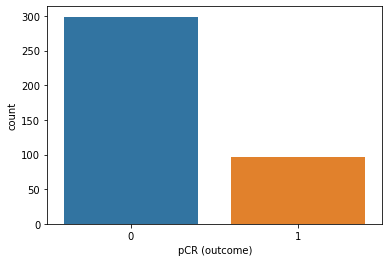

In [7]:
# Classification Target Outcomes
sns.countplot(x="pCR (outcome)", data=imputed_df)
imputed_df['pCR (outcome)'].value_counts()

<AxesSubplot:>

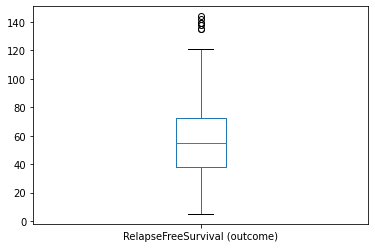

In [8]:
# Regression Target Boxplot
imputed_df['RelapseFreeSurvival (outcome)'].plot(kind='box')

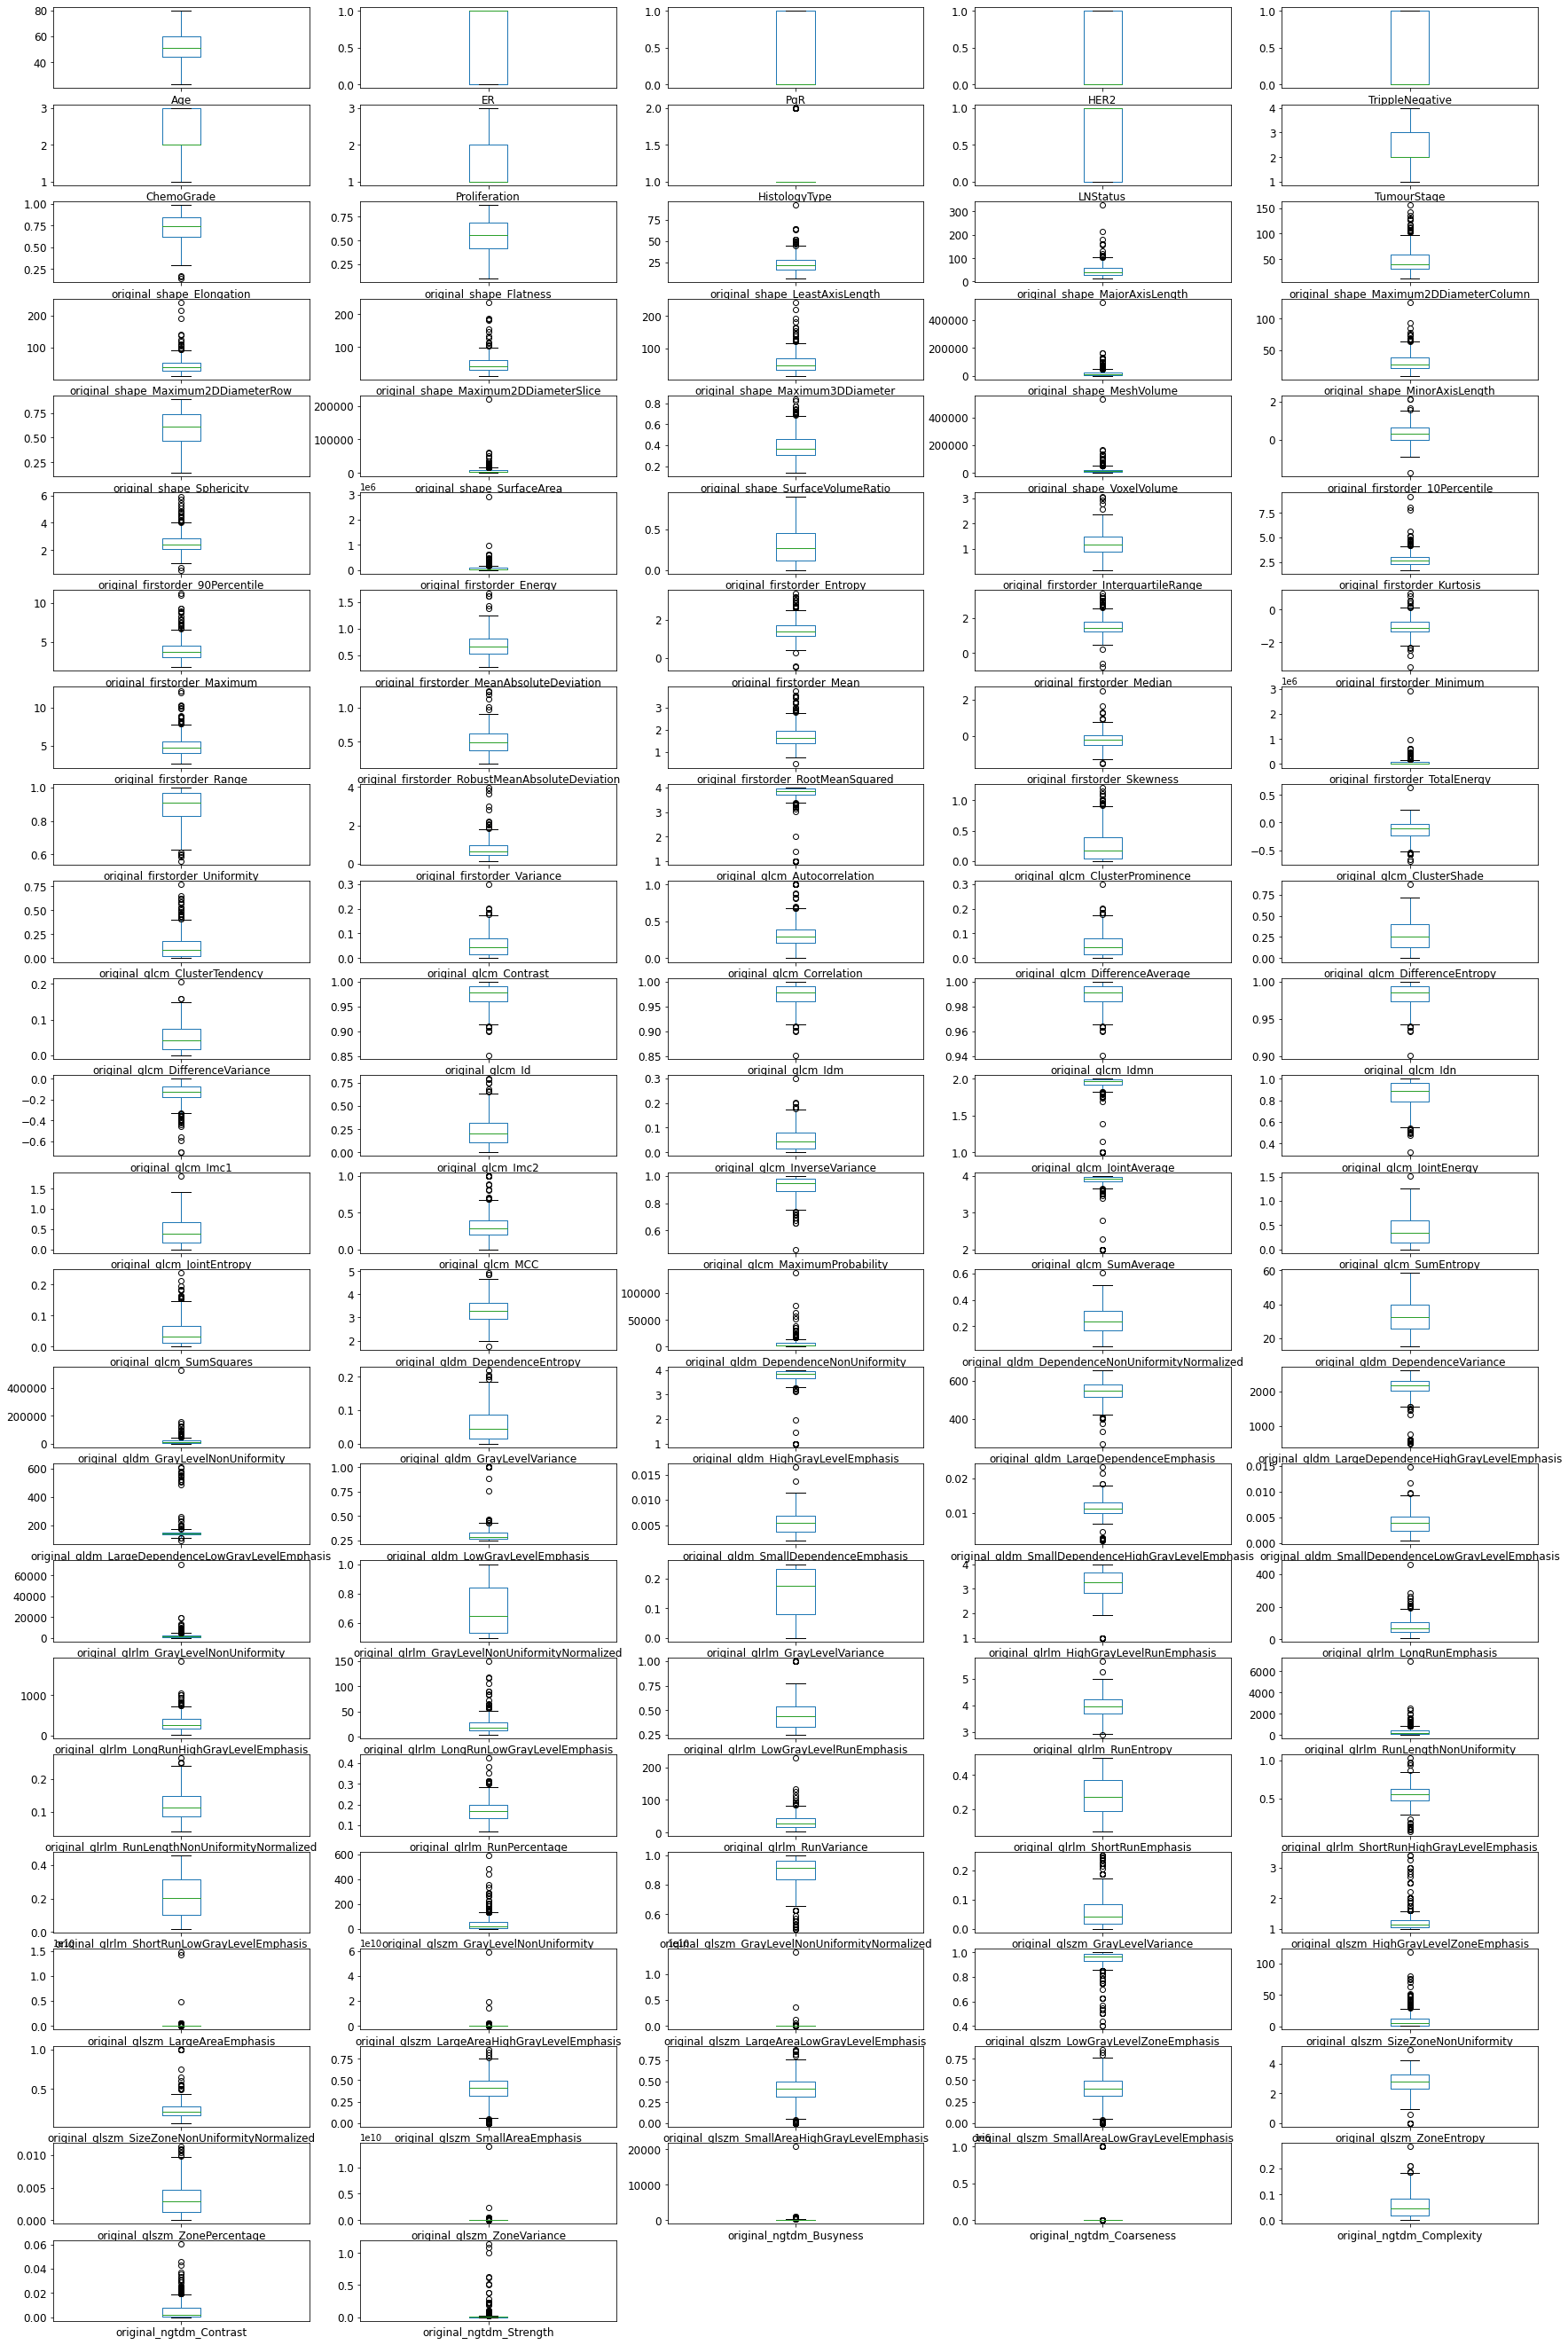

In [9]:
data_mean = imputed_df.iloc[:, 2:]
data_mean.plot(kind='box', subplots=True, layout=(25,5), sharex=False,
sharey=False, fontsize=12, figsize=(30,50));

In [ ]:
last_six = imputed_df.iloc[:, 114:]
last_six.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

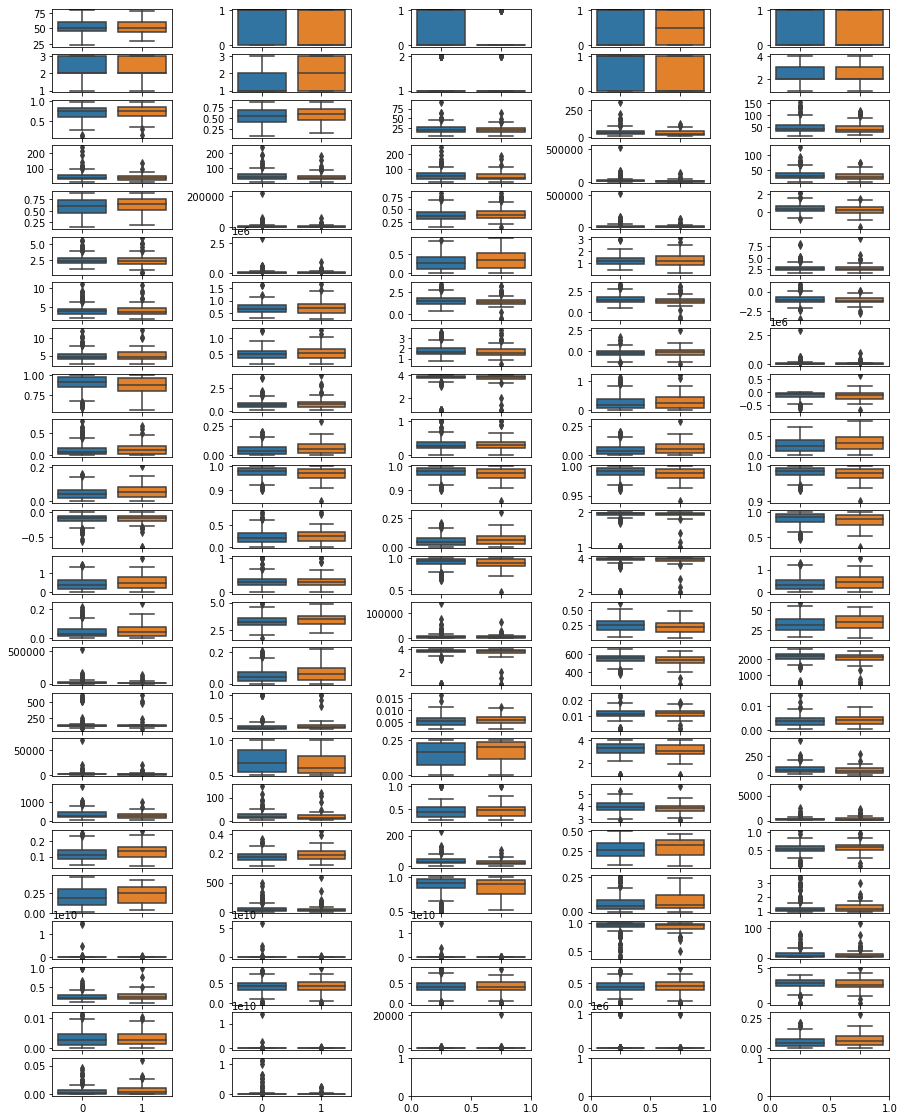

In [10]:
# Imputed data visualisation (pcR)
fig, axes = plt.subplots(nrows=24, ncols=5, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(imputed_df.columns[2:]):
    v1= sns.boxplot(y=col, x='pCR (outcome)', data=imputed_df, ax=axes[i])
    v1.set(xlabel=None)
    v1.set(ylabel=None)

In [11]:
imputed_df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,3.950000e+02,3.950000e+02,3.950000e+02,395.000000,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.243038,55.860127,51.860679,0.541772,0.402532,0.313924,0.331646,2.400000,1.587342,1.139241,...,3.939499e-01,3.892751e-01,2.710568e+00,0.003282,5.753750e+07,178.535250,32911.425364,0.056585,0.005941,0.029639
std,0.429462,26.649447,10.930083,0.498884,0.491030,0.464674,0.471401,0.500761,0.773509,0.346636,...,1.680516e-01,1.629895e-01,7.588167e-01,0.002403,7.108221e+08,1051.812623,178630.940199,0.047387,0.008434,0.116617
min,0.000000,5.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.425736,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.194476e-01,3.165775e-01,2.327081e+00,0.001310,1.119281e+06,18.723677,0.001843,0.018575,0.000309,0.001474
50%,0.000000,55.000000,51.200548,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.097481e-01,4.048276e-01,2.807355e+00,0.002847,3.469426e+06,68.117000,0.004383,0.046980,0.002294,0.003208
75%,0.000000,72.791667,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,5.000099e-01,4.957960e-01,3.277613e+00,0.004679,9.341503e+06,155.512297,0.013772,0.084692,0.007895,0.009504
max,1.000000,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [12]:
# Clip some outliers
clipped_df = imputed_df[(np.abs(stats.zscore(imputed_df)) < 3).all(axis=1)]
clipped_df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310.000000,310.000000,310.000000,310.000000,3.100000e+02,310.000000,310.000000,310.000000,3.100000e+02,310.000000
mean,0.248387,54.625000,51.410632,0.522581,0.396774,0.300000,0.354839,2.432258,1.625806,1.145161,...,0.413138,0.411520,2.814609,0.003397,1.270369e+07,118.493003,0.014777,0.058506,5.710386e-03,0.013127
std,0.432776,25.810150,11.015507,0.500297,0.490019,0.458998,0.479238,0.502671,0.785371,0.352833,...,0.139734,0.137217,0.612204,0.002228,4.196628e+07,139.871891,0.037926,0.041848,6.875767e-03,0.033631
min,0.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.001482,0.001482,1.145110,0.000125,8.747147e+04,0.899809,0.000393,0.000216,3.160000e-08,0.000365
25%,0.000000,38.000000,43.824094,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.331774,0.331773,2.409075,0.001642,1.369446e+06,29.678758,0.001886,0.024446,5.356670e-04,0.001678
50%,0.000000,53.291667,50.729637,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.416803,0.414715,2.854085,0.003005,3.452277e+06,72.783388,0.003885,0.049532,2.616566e-03,0.003491
75%,0.000000,71.666667,58.975000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,0.506402,0.505725,3.273471,0.004771,7.912658e+06,153.112569,0.009491,0.086567,8.316779e-03,0.008639
max,1.000000,135.000000,78.992471,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,0.865201,0.797009,4.947427,0.010431,4.732905e+08,838.677442,0.278250,0.165277,2.887855e-02,0.236713


In [14]:
len(imputed_df.index) #imputed data count

395

In [15]:
len(clipped_df.index) #imputed + clipped data count

310

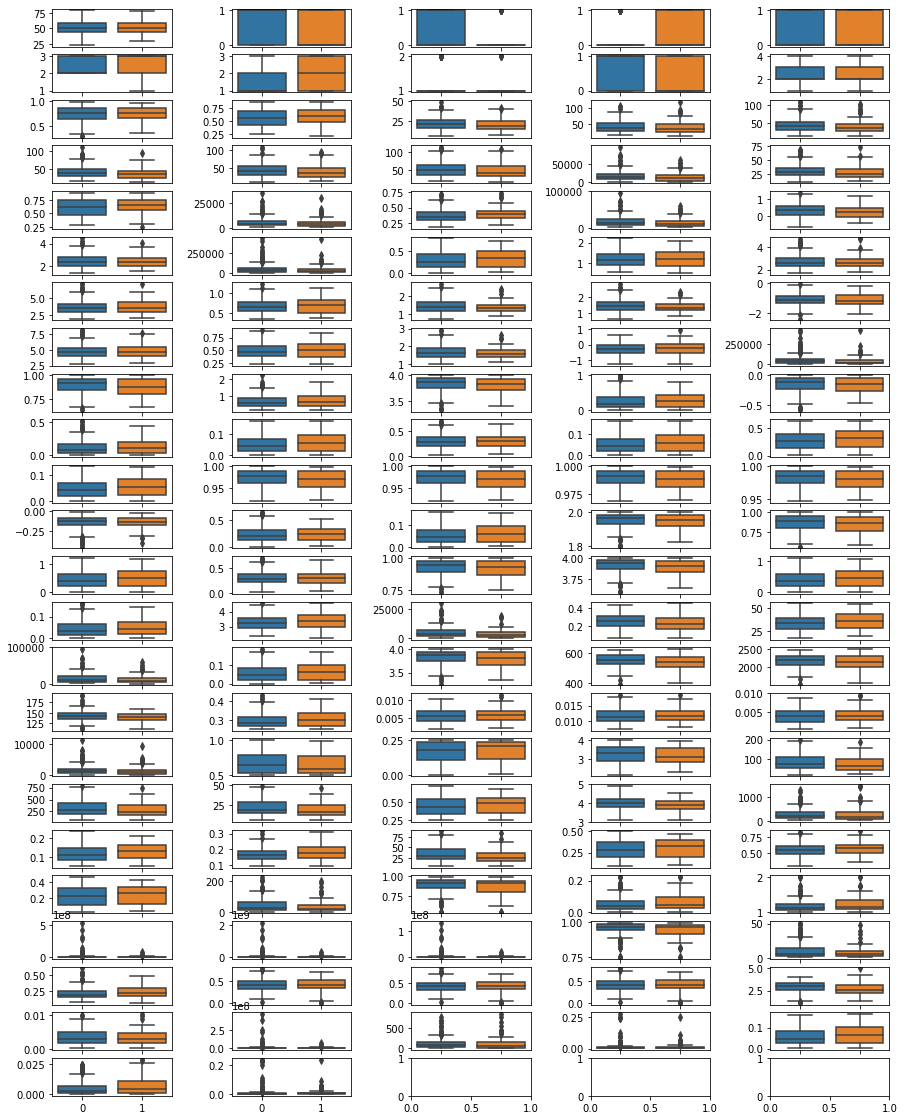

In [17]:
# Clipped data visualisation (pcR)
fig, axes = plt.subplots(nrows=24, ncols=5, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(clipped_df.columns[2:]):
    v2= sns.boxplot(y=col, x='pCR (outcome)', data=clipped_df, ax=axes[i])
    v2.set(xlabel=None)
    v2.set(ylabel=None)

In [ ]:
# Normalize data

In [23]:
minmax_scalar = MinMaxScaler()
clipped_df = minmax_scalar.fit_transform(clipped_df)

In [22]:
transformer = RobustScaler().fit(imputed_df)
transformer.transform(imputed_df)

array([[ 1.        ,  2.55808383, -0.6549618 , ...,  2.05142861,
         3.71872401, -0.30517158],
       [ 0.        ,  2.5005988 , -0.78337878, ..., -0.22637838,
        -0.16986838,  0.05935598],
       [ 1.        ,  2.2994012 , -1.29704672, ..., -0.3466287 ,
        -0.23264507,  0.40333753],
       ...,
       [ 0.        , -0.21556886,  1.13003427, ...,  0.10712362,
         0.18481922, -0.229185  ],
       [ 0.        , -0.23233533, -0.33391934, ..., -0.4280026 ,
        -0.26143086,  2.42436398],
       [ 1.        , -0.23712575,  0.26321963, ...,  0.12358105,
         0.10007477,  0.02692004]])